In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [2]:
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [3]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [4]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [5]:
print(f'species shape: {species.shape}')
print(f'observations shape: {observations.shape}')

species shape: (5824, 4)
observations shape: (23296, 3)


In [6]:
unique_species = species['scientific_name'].nunique()
print(f'There are {unique_species} unique species in parks.')

There are 5541 unique species in parks.


In [7]:
categories_of_species = species.groupby('category').size()
categories_of_species

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Some components that you may want to include:

    What is the distribution of conservation_status for animals?
    Are certain types of species more likely to be endangered?
    Are the differences between species and their conservation status significant?
    Which species were spotted the most at each park?


What is the distribution of conservation_status for animals?

Text(0, 0.5, 'Frequency')

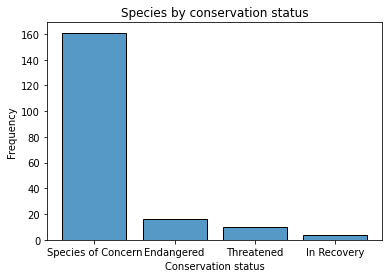

In [8]:
sns.histplot(species['conservation_status'], shrink=0.8)
plt.title('Species by conservation status')
plt.xlabel('Conservation status')
plt.ylabel('Frequency')

In [9]:
pivot_df = pd.crosstab(species['category'], species['conservation_status'])

pivot_df

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1,0,4,2
Bird,4,3,72,0
Fish,3,0,4,4
Mammal,7,1,28,2
Nonvascular Plant,0,0,5,0
Reptile,0,0,5,0
Vascular Plant,1,0,43,2


Are certain types of species more likely to be endangered

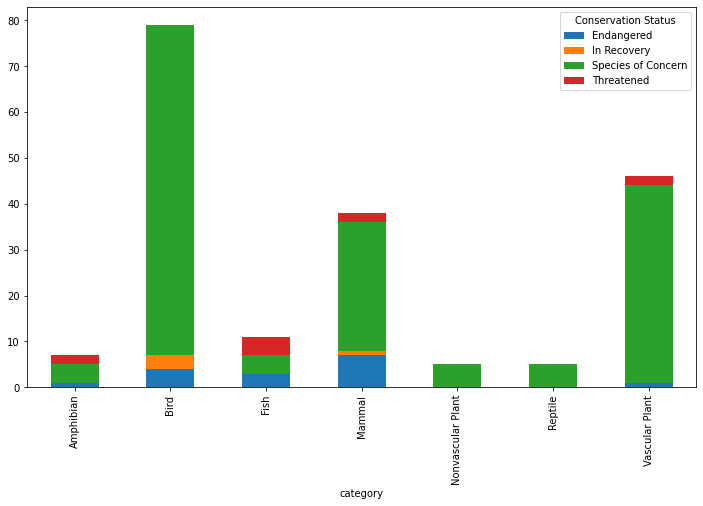

In [10]:
pivot_df.plot(kind='bar', stacked=True, figsize=(12,7))
plt.legend(title='Conservation Status')

In [11]:
conservationCategory = species.groupby(['conservation_status', 'category'])['scientific_name']\
.count().unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


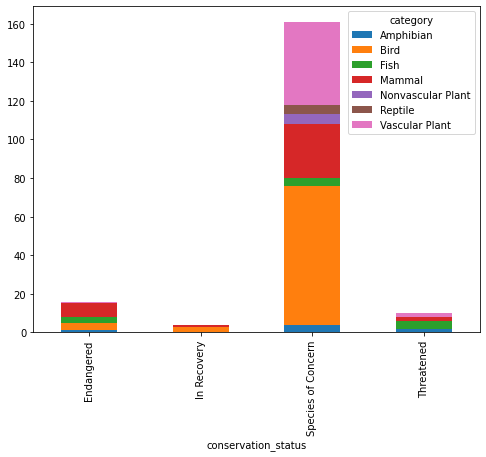

In [12]:
ax = conservationCategory.plot(kind='bar', figsize=(8,6), stacked=True)

Fish and Amphibians

In [13]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [14]:
parks = observations['park_name'].unique()
print(f'Parks: {parks}')

Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [15]:
# Let's use a single DataFrame for clarity
df = observations.copy()

# Ensure you haven't dropped or filtered rows at this point

# Now, find the indices
idx = df.groupby('park_name')['observations'].idxmax()

# Access the rows using the indices
result = df.loc[idx]

In [16]:
result

,scientific_name,park_name,observations
13138,Valerianella radiata,Bryce National Park,176
8840,Sonchus asper ssp. asper,Great Smoky Mountains National Park,147
11281,Lycopodium tristachyum,Yellowstone National Park,321
6682,Ivesia shockleyi var. shockleyi,Yosemite National Park,223


In [17]:
species.fillna('No data', inplace=True)

In [18]:
species['is_protected'] = species['conservation_status'] != 'No data'

In [19]:
protected_by_categories = species.groupby(['category', 'is_protected'])['scientific_name']\
.nunique().reset_index()\
.pivot(columns='is_protected', index='category', values='scientific_name')\
.reset_index()

protected_by_categories.columns = ['category', 'not_protected', 'protected']

In [20]:
protected_by_categories['percent'] = round(protected_by_categories['protected'] / (protected_by_categories['protected'] + protected_by_categories['not_protected']), 2)

In [21]:
protected_by_categories

,category,not_protected,protected,percent
0,Amphibian,72,7,0.09
1,Bird,413,75,0.15
2,Fish,115,11,0.09
3,Mammal,146,30,0.17
4,Nonvascular Plant,328,5,0.02
5,Reptile,73,5,0.06
6,Vascular Plant,4216,46,0.01


### Statistical Significance

The chi-squared (χ2χ2) statistic for a contingency

In [22]:
contingency1 = [[30, 146],
                [75, 413]] # Mammal and Bird relationship

chi2, p, dof, expected = chi2_contingency(contingency1)
print("P value: " + str(round(p,2)))

P value: 0.69


The statistical significance says that there is no significant difference for the level of protection between mammals and birds.

In [23]:
contingency2 = [[75, 413],
                [5, 328]] # Bird and Nonvascular Plant relationship

chi2, p, dof, expected = chi2_contingency(contingency2)
print("P value: " + str(p))

P value: 1.0546306904975004e-10


Birds have statistically higher level of protection than vascular plants.

In [24]:
contingency3 = [[75, 413],
                [5, 73]] # Bird and Reptile relationship

chi2, p, dof, expected = chi2_contingency(contingency3)
print("P value: " + str(p))

P value: 0.05313542232154235


In [25]:
contingency4 = [[30, 146],
                [5, 73]] # Mammal and Reptile relationship

chi2, p, dof, expected = chi2_contingency(contingency4)
print("P value: " + str(p))

P value: 0.03835559022969898


Mammals have statistically higher levels of protection than reptiles.

### Species in Park

In [26]:
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No data,False
1,Mammal,Bos bison,"American Bison, Bison",No data,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No data,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No data,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No data,False


In [27]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == 'Mammal'].common_names\
.apply(remove_punctuations).str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [28]:
no_duplicates = [list(dict.fromkeys(row)) for row in common_Names]

In [29]:
no_duplicates[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [30]:
# Flatten the data into a one-dimensional list
flattened_data = [item for sublist in no_duplicates for item in sublist]

In [31]:
flattened_data[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [32]:
from collections import Counter

In [33]:
# Count occurrences of each word
word_counts = Counter(flattened_data)

# Display counts for all words
for word, count in word_counts.items():
    print(f"'{word}' occurs {count} times.")

'Gappers' occurs 1 times.
'RedBacked' occurs 2 times.
'Vole' occurs 11 times.
'American' occurs 12 times.
'Bison' occurs 2 times.
'Aurochs' occurs 1 times.
'Domestic' occurs 2 times.
'Cattle' occurs 1 times.
'Feral' occurs 5 times.
'Domesticated' occurs 1 times.
'Sheep' occurs 3 times.
'Mouflon' occurs 1 times.
'Red' occurs 8 times.
'Wapiti' occurs 1 times.
'Or' occurs 4 times.
'Elk' occurs 3 times.
'WhiteTailed' occurs 4 times.
'Deer' occurs 5 times.
'Hog' occurs 1 times.
'Wild' occurs 3 times.
'Pig' occurs 2 times.
'Coyote' occurs 1 times.
'Gray' occurs 8 times.
'Wolf' occurs 4 times.
'Common' occurs 7 times.
'Fox' occurs 6 times.
'Black' occurs 4 times.
'Cross' occurs 1 times.
'Silver' occurs 1 times.
'Mountain' occurs 10 times.
'Lion' occurs 4 times.
'Cat' occurs 1 times.
'Wildcat' occurs 1 times.
'Bobcat' occurs 1 times.
'Panther' occurs 1 times.
'Striped' occurs 1 times.
'Skunk' occurs 4 times.
'Eastern' occurs 11 times.
'Spotted' occurs 4 times.
'River' occurs 3 times.
'Otter' o

Bats are the most protected species. 'Bat' occurs 23 times.

In [34]:
species['is_bat'] = species.common_names.str.contains(r'\bBat\b', regex=True)

In [35]:
print(len(species[species['is_bat']]))

23


In [36]:
species[species['is_bat']]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No data,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No data,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No data,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No data,False,True


In [37]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [38]:
bat_observations = observations.merge(species[species['is_bat']])

In [39]:
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No data,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [47]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [48]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected'])['observations']\
.sum()\
.reset_index()

obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Text(0, 0.5, 'Observations')

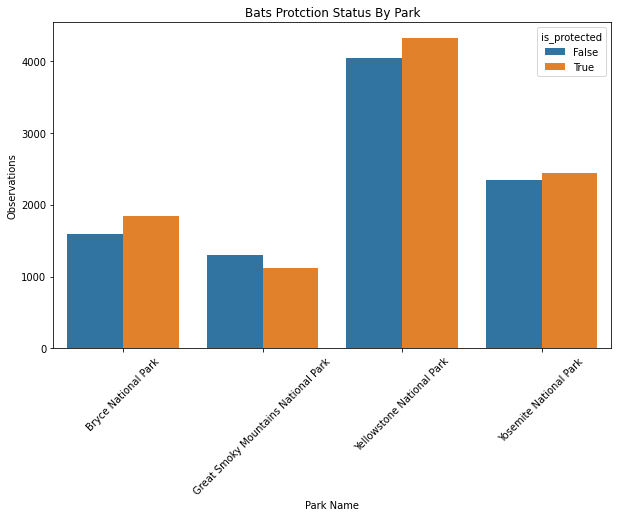

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(data=obs_by_park, x='park_name', y='observations', hue='is_protected')
plt.xticks(rotation=45)
plt.title('Bats Protction Status By Park')
plt.xlabel('Park Name')
plt.ylabel('Observations')

In [54]:
# Great Smoky Mountains National Park should protect more bats!